# STATISTICAL PART

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import norm
from scipy.stats import t
from numpy.random import seed
from scipy import stats

In [34]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [35]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [36]:
#Let`s copy our data and keep data`s itself as data for further process

data['income_class'] = data['income'].map({'>50K':1,'<=50K':0})

data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_class
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0


In [37]:
# Let`s seperate data into two with respect to their income levels as 
# above 50K income and less or equal to 50K income


higher = data[data['income_class']==1]
lower = data[data['income_class']==0]

In [38]:
higher.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income_class
count,7841.000000,7.841000e+03,7841.000000,7841.000000,7841.000000,7841.000000,7841.0
mean,44.249841,1.880050e+05,11.611657,4006.142456,195.001530,45.473026,1.0
std,10.519028,1.025418e+05,2.385129,14570.378951,595.487574,11.012971,0.0
min,19.000000,1.487800e+04,2.000000,0.000000,0.000000,1.000000,1.0
25%,36.000000,1.191010e+05,10.000000,0.000000,0.000000,40.000000,1.0
50%,44.000000,1.761010e+05,12.000000,0.000000,0.000000,40.000000,1.0
75%,51.000000,2.309590e+05,13.000000,0.000000,0.000000,50.000000,1.0
max,90.000000,1.226583e+06,16.000000,99999.000000,3683.000000,99.000000,1.0


In [39]:
lower.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income_class
count,24720.000000,2.472000e+04,24720.000000,24720.000000,24720.000000,24720.000000,24720.0
mean,36.783738,1.903409e+05,9.595065,148.752468,53.142921,38.840210,0.0
std,14.020088,1.064823e+05,2.436147,963.139307,310.755769,12.318995,0.0
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.0
25%,25.000000,1.176060e+05,9.000000,0.000000,0.000000,35.000000,0.0
50%,34.000000,1.794650e+05,9.000000,0.000000,0.000000,40.000000,0.0
75%,46.000000,2.390230e+05,10.000000,0.000000,0.000000,40.000000,0.0
max,90.000000,1.484705e+06,16.000000,41310.000000,4356.000000,99.000000,0.0


In [40]:
pd.DataFrame(lower['sex'].value_counts(normalize=True))

,sex
Male,0.611974
Female,0.388026


In [41]:
m = lower.groupby('race').sex.value_counts(normalize=True)
m

race                sex   
Amer-Indian-Eskimo  Male      0.610909
                    Female    0.389091
Asian-Pac-Islander  Male      0.602883
                    Female    0.397117
Black               Female    0.535258
                    Male      0.464742
Other               Male      0.581301
                    Female    0.418699
White               Male      0.632156
                    Female    0.367844
Name: sex, dtype: float64

In [42]:
m.unstack()

sex,Female,Male
race,,
Amer-Indian-Eskimo,0.389091,0.610909
Asian-Pac-Islander,0.397117,0.602883
Black,0.535258,0.464742
Other,0.418699,0.581301
White,0.367844,0.632156


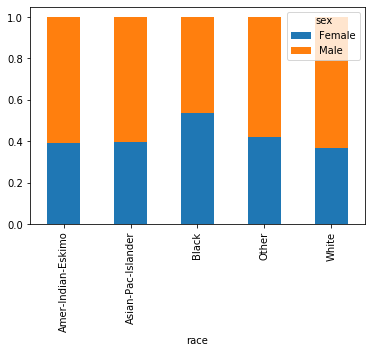

In [43]:
m.unstack().plot(kind='bar',stacked=True)

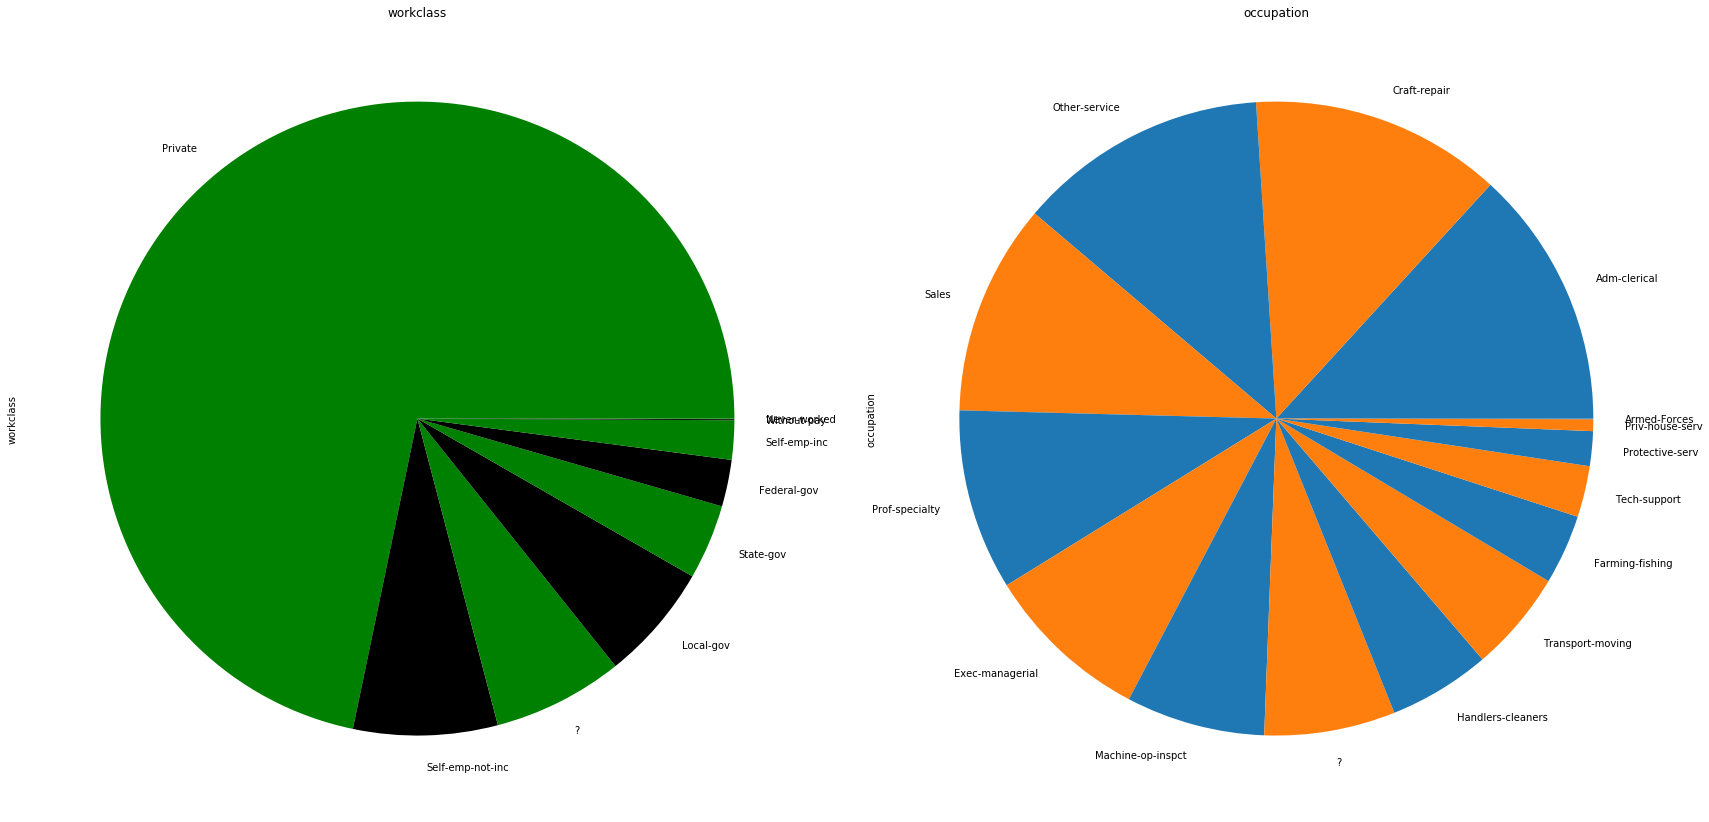

In [44]:
plt.figure(figsize=(24,20))
plt.subplot(1,2,1);lower.workclass.value_counts().plot(kind='pie',colors=['green','black']); plt.title('workclass')
plt.subplot(1,2,2);lower.occupation.value_counts().plot(kind='pie',colors=['C0','C1']); plt.title('occupation')
plt.tight_layout()

### CHI SQUARE TEST

   Chi square test is used for comparing categorical features.

In [45]:
# H0:'Race' and 'Income' variables are independent.
# Ha:'Race' and 'Income' variables are not independent.

In [46]:
pd.crosstab(data['income'],data['race'])

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
income,,,,,
<=50K,275,763,2737,246,20699
>50K,36,276,387,25,7117


The null hypothesis states that knowing the race variables doesnt help us predict the variables of income. Alternative hypothesis is that knowing race variables might help us to predict income values.

In [47]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(data['race'],data['income']))

(330.9204310085741,
 2.305960610160958e-70,
 4,
 array([[  236.10822763,    74.89177237],
        [  788.79886981,   250.20113019],
        [ 2371.71094254,   752.28905746],
        [  205.74060993,    65.25939007],
        [21117.64135008,  6698.35864992]]))

### P-value less than 0.05(significance level), We then reject Null Hypothesis and accept alternative Hypothesis.
It means race is not an independent column.Income is correlated with race.

### Importance of age for income

     People make more money in time.Their income levels increase depend on accumulated years.
     You will see a study supports my sentences below.

In [48]:
wfh = higher[higher['race']=='White']
wfh = wfh[wfh['sex']=='Female']

wmh = higher[higher['race']=='White']
wmh = wmh[wmh['sex']=='Male']

wfl = lower[lower['race']=='White']
wfl = wfl[wfl['sex']=='Female']

wml = lower[lower['race']=='White']
wml = wml[wml['sex']=='Male']

In [49]:
print("average age of white females who have higher than 50K income = {}\naverage age of white females who have lower than 50K income = {}\naverage age of white males who have higher than 50K income = {}\naverage age of white males who have lower than 50K income = {}".format(round(wfh['age'].mean(),2),round(wfl['age'].mean(),2),round(wmh['age'].mean(),2),round(wml['age'].mean(),2)))

average age of white females who have higher than 50K income = 42.28
average age of white females who have lower than 50K income = 36.07
average age of white males who have higher than 50K income = 44.74
average age of white males who have lower than 50K income = 37.29


### Z TEST

### 1) How many would you expect to be black male people with above 50K income aged between 25 and 55?

In [50]:
bpa = int(higher[(higher['race']=='Black')&(higher['sex']=='Male')].age.mean())
bps = int(higher[(higher['race']=='Black')&(higher['sex']=='Male')].age.std())

print("average age of black males who have higher than 50K income = {}\nstd age of black males who have higher than 50K income = {}".format(bpa,bps))

average age of black males who have higher than 50K income = 44
std age of black males who have higher than 50K income = 10


In [51]:
len(higher[(higher['race']=='Black')&(higher['sex']=='Male')])

297

In [52]:
z1 = (25-44)/10
z2 = (55-44)/10
print("z1 = {}\nz2 = {}".format(z1,z2)) 

z1 = -1.9
z2 = 1.1


In [53]:
print("Area between two z scores = {}".format(.8643-.0287))

Area between two z scores = 0.8356


In [54]:
print("Number of black male above 50K income aged between 25 and 55 =  {}".format(int(297*0.8356)))

Number of black male above 50K income aged between 25 and 55 =  248


### 2) Comparing average age of two different groups

Average age of black people with above 50K and below with 50K in the dataset are respectively 43 and 36.
standard deviations of both group are respectively 9 and 12.
Test if mean of both group in real world is equal each other?(alpha=0.01)

In [55]:
#   H0: Ma-Mb = 0
#   Ha: Ma-Mb ≠ 0

In [56]:
Ma = 43
Mb = 36
σ1 = 9
σ2 = 12
z = (Ma-Mb-0)/((σ1**2/387)+(σ2**2/2737))**0.5
z

13.677859045246745

    our z value=13.7 is way bigger than z critical value=2.575 
    so we reject Null hypothesis and accept alternative hypothesis
    As a result mean age of black group with above 50K and below 50K are not going to be equal each other.

### T TEST

In [57]:
lf = lower[lower['sex']=='Female']
lf['education.num'].mean()

9.82047539616347

In [58]:
lm = lower[lower['sex']=='Male']
lm['education.num'].mean()

9.45214172395558

In [59]:
lf = lower[lower['sex']=='Female']
lf['education.num'].std()

2.3066648216722743

In [60]:
lm = lower[lower['sex']=='Male']
lm['education.num'].std()

2.504380384145194

 We are curious as to whether education level(number) differ between genders in a group that below 50K income. We take out samples from both male and female.Here is the result below:(alpha=0.05) 

In [61]:
#We take samples that have below 30 for the sake of being independent rule 
#from both group in order to apply T test.
a = np.random.choice(lf['education.num'],24)
b = np.random.choice(lm['education.num'],20)
print(a.mean(),b.mean(),a.std(),b.std())

9.875 9.95 2.8182810955143087 2.108909670896314


In [62]:
pd.DataFrame({'Mean':[10.5,9.45],
              'Std':[2.33,2.65],
             'Samples':[24,20]},
             index=['Female<50K','Male<50K'])

,Mean,Std,Samples
Female<50K,10.50,2.33,24
Male<50K,9.45,2.65,20


In [63]:
t=(10.50-9.45)/((2.33**2/24)+(2.65**2/20))**0.5
t


#Small t value indicates that education levels for male and female are similar.

1.3819029685511863

In [70]:
stats.ttest_ind(a,b)

Ttest_indResult(statistic=-0.09601321720529037, pvalue=0.9239667474636487)

We fail to reject Null hypothesis since p value is greater than threshold(significance level).
As a result,there is no significance difference between being opposite genders of lower income
as to education levels.